In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

KeyboardInterrupt: 

In [175]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print(train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [176]:
#looking at training set
print(train.describe())
print(train.isna().sum())

#looking at testing set
print(test.describe())
print(test.isna().sum())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182

In [177]:
train = train.drop(["Name", "PassengerId", "Destination"], axis=1)
test = test.drop(["Name", "PassengerId", "Destination"], axis=1)

#looking at training set
print(train.describe())
print(train.isna().sum())

#looking at testing set
print(test.describe())
print(test.isna().sum())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
HomePlanet      201
CryoSleep       217
Cabin           199
Age             179
VIP             203

In [178]:
#train = train.dropna()

#looking at training set
print(train.describe())
print(train.isna().sum())
print(train['CryoSleep'])


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
HomePlanet      201
CryoSleep       217
Cabin           199
Age             179
VIP             203

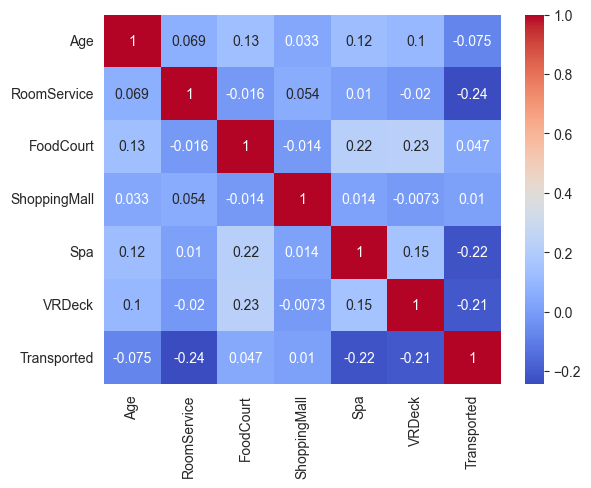

In [179]:
#Sns heat map using numbers and bool
numeric_columns = train.select_dtypes(include=['int64', 'float64', "bool"])
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

In [180]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

In [181]:
actual = pd.read_csv("Data/sample_submission.csv")
actual = actual.drop("PassengerId", axis=1)



#Filling NA Values in Cabin for data reading
train["Cabin"] = train["Cabin"].fillna(str("T"))
test["Cabin"] = test["Cabin"].fillna(str('T'))

#Filling NA Values in Cabin for data reading
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(train["Age"].mean())

#Filling NA Values in Cabin for data reading
train["HomePlanet"] = train["HomePlanet"].fillna("NA")
test["HomePlanet"] = test["HomePlanet"].fillna("NA")

#Filling NA Values in Cabin for data reading
train["CryoSleep"] = train["CryoSleep"].fillna(False)
test["CryoSleep"] = test["CryoSleep"].fillna(False)

trial = 0

#Crap not needed
if trial == 1:

    #Filling NA Values in Cabin for data reading
    train["VIP"] = train["VIP"].fillna(False)
    test["VIP"] = test["VIP"].fillna(False)

    #Filling NA Values in Cabin for data reading
    train["RoomService"] = train["RoomService"].fillna(train["RoomService"].mean())
    test["RoomService"] = test["RoomService"].fillna(train["RoomService"].mean())

    #Filling NA Values in Cabin for data reading
    train["FoodCourt"] = train["FoodCourt"].fillna(train["FoodCourt"].mean())
    test["FoodCourt"] = test["FoodCourt"].fillna(train["FoodCourt"].mean())

    #Filling NA Values in Cabin for data reading
    train["ShoppingMall"] = train["ShoppingMall"].fillna(train["ShoppingMall"].mean())
    test["ShoppingMall"] = test["ShoppingMall"].fillna(train["ShoppingMall"].mean())

    #Filling NA Values in Cabin for data reading
    train["Spa"] = train["Spa"].fillna(train["Spa"].mean())
    test["Spa"] = test["Spa"].fillna(train["Spa"].mean())

    #Filling NA Values in Cabin for data reading
    train["VRDeck"] = train["VRDeck"].fillna(train["VRDeck"].mean())
    test["VRDeck"] = test["VRDeck"].fillna(train["VRDeck"].mean())

else: 
    train = train.drop(["VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
    test = test.drop(["VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

    


#Takes the first letter of Cabin and splits it up to make data readable.
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
test['Cabin'] = test['Cabin'].map(lambda x: x[0])


#Error keeps popping up that could not convert string to float: 'Europa' Map changes them to numbers
train['HomePlanet'] = train["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3, "NA": 4})
train['Cabin'] = train["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})

test['HomePlanet'] = test["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3, "NA" : 4})
test['Cabin'] = test["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})



X_train = train.drop("Transported", axis=1)
X_test = test
y_train = train['Transported']
y_test = actual 


C:\Users\scout\AppData\Local\Temp\ipykernel_21496\4280779450.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["CryoSleep"] = train["CryoSleep"].fillna(False)
C:\Users\scout\AppData\Local\Temp\ipykernel_21496\4280779450.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["CryoSleep"] = test["CryoSleep"].fillna(False)


Accuracy before optimization for XGBoost: 0.6025251344400281


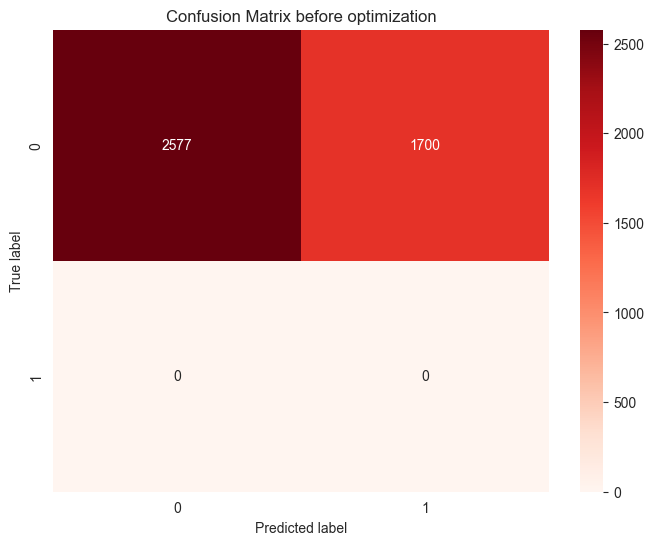

Accuracy after optimization for XGBoost: 0.5938742108954875


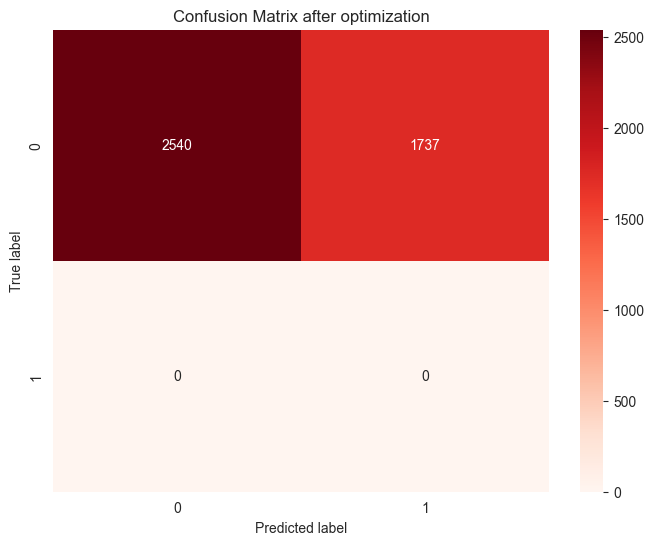

In [182]:
# Initialize XGBoost classifier

xgb_model = xgb.XGBClassifier(random_state=1103)


# Train the model

xgb_model.fit(X_train, y_train)


# Make predictions

y_pred = xgb_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_xgb = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for XGBoost: {accuracy_before_optimization_xgb}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)
# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'learning_rate': [0.01, 0.1, 0.5, 1],

    'n_estimators': [50, 100, 200, 500],

    'gamma': [0, 0.1, 0.5, 1],

    'subsample': [0.5, 0.8, 1],

    'colsample_bytree': [0.5, 0.8, 1],

    'reg_alpha': [0, 0.1, 0.5, 1],

    'reg_lambda': [0, 0.1, 0.5, 1]

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_xgb = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_xgb.predict(X_test)


# Evaluate the model after optimization
accuracy_after_optimization_xgb = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for XGBoost: {accuracy_after_optimization_xgb}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

Accuracy before optimization for Random Forest: 0.5805471124620061


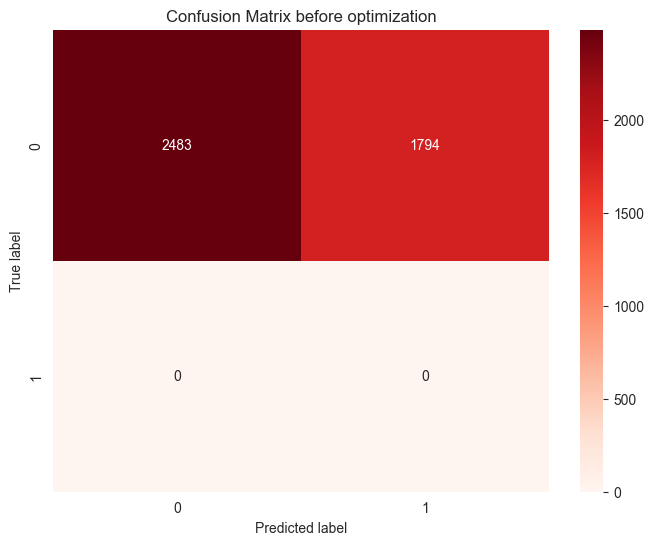

Accuracy after optimization for Random Forest: 0.6109422492401215


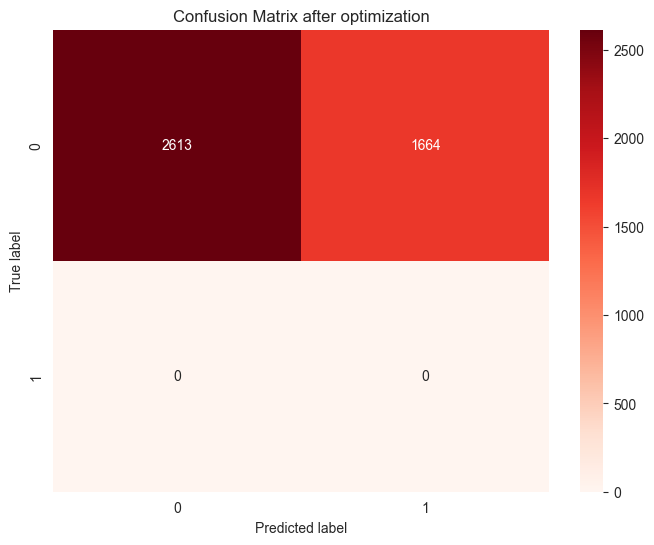

In [183]:
# Initialize Random Forest classifier

rf_model = RandomForestClassifier(random_state=1103)


# Train the model

rf_model.fit(X_train, y_train)


# Make predictions

y_pred = rf_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_rf = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Random Forest: {accuracy_before_optimization_rf}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'n_estimators': [50, 100, 200, 500],

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10]
    
}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_rf = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_rf.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_rf = accuracy_score(y_test, y_pred_optimized)

print(f"Accuracy after optimization for Random Forest: {accuracy_after_optimization_rf}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

Accuracy before optimization for Logistic Regression: 0.6034603694178162


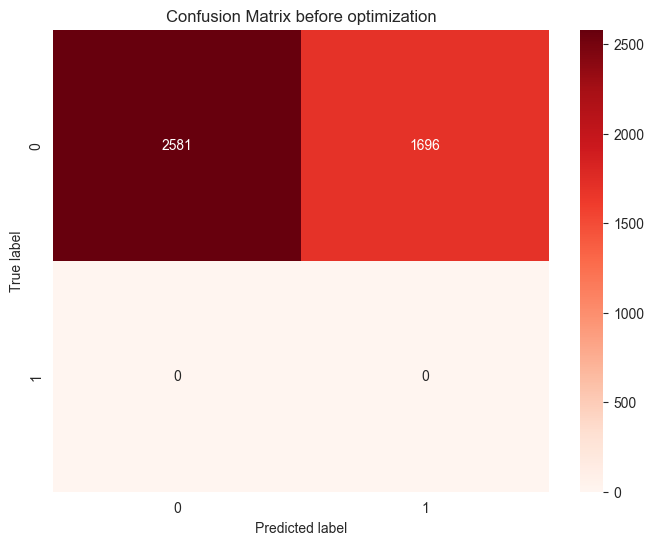

Accuracy after optimization for Logistic Regression: 0.6034603694178162


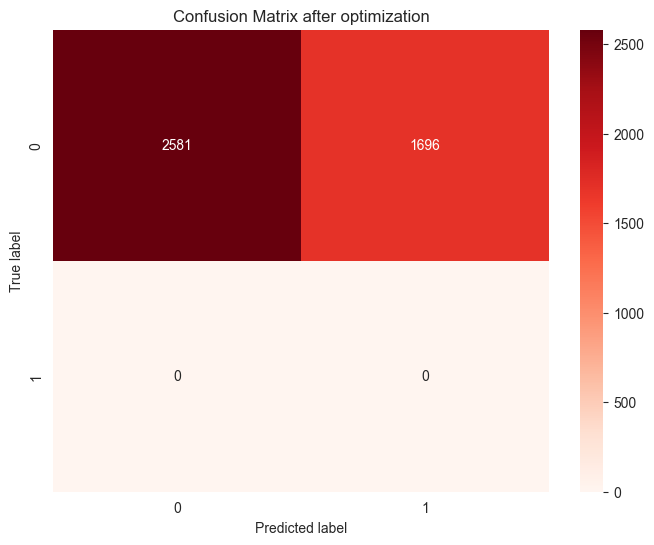

In [184]:
# Initialize Logistic Regression classifier

lr_model = LogisticRegression(max_iter=2000)


# Train the model

lr_model.fit(X_train, y_train)


# Make predictions

y_pred = lr_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_lr = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Logistic Regression: {accuracy_before_optimization_lr}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'C': [0.1, 1, 10, 100],

    'solver': ['liblinear', 'newton-cg', 'lbfgs']

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_lr = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_lr.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_lr = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Logistic Regression: {accuracy_after_optimization_lr}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()


Accuracy before optimization for KNN: 0.5770399812953004


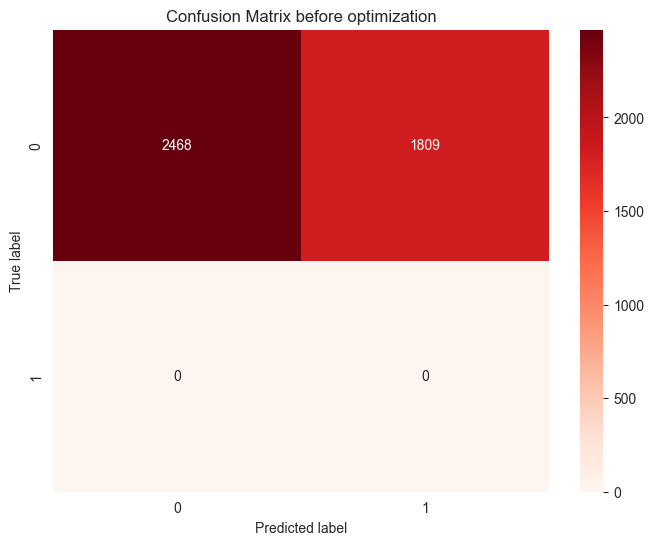

Accuracy after optimization for KNN: 0.6139817629179332


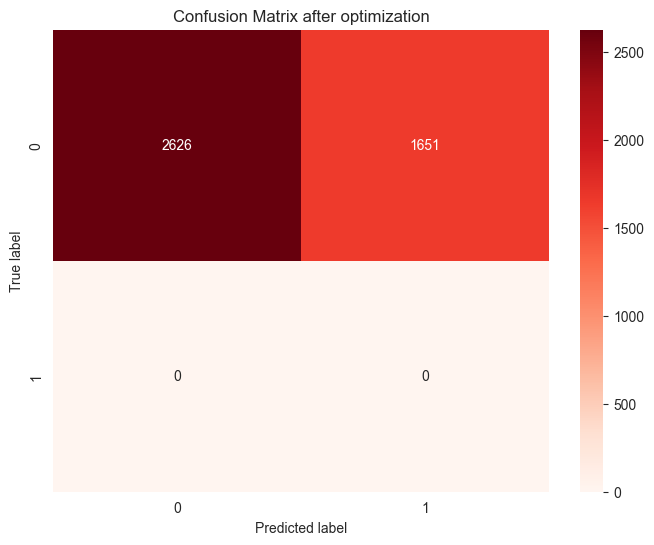

In [185]:
# Initialize KNN classifier

knn_model = KNeighborsClassifier()


# Train the model

knn_model.fit(X_train, y_train)


# Make predictions

y_pred = knn_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_knn = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for KNN: {accuracy_before_optimization_knn}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {
    
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],

    'weights': ['uniform', 'distance'],

    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],

    'leaf_size': [10, 20, 30, 40, 50]

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_knn = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_knn.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_knn = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for KNN: {accuracy_after_optimization_knn}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

Accuracy before optimization for Decision Tree: 0.5978489595510872


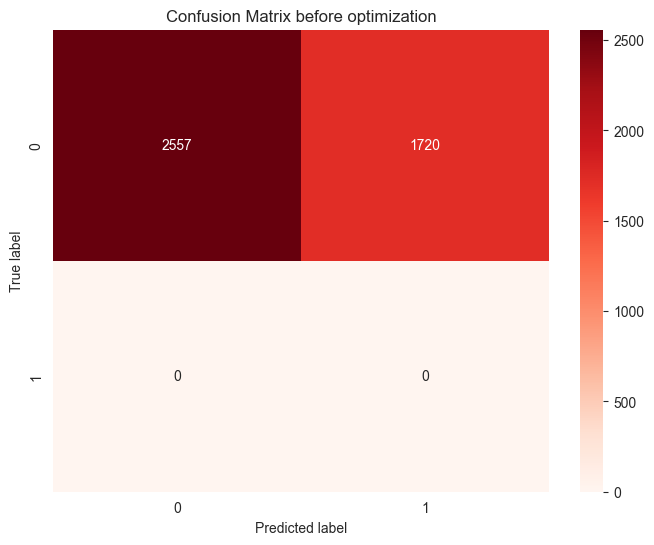

Accuracy after optimization for Decision Tree: 0.6233341126958148


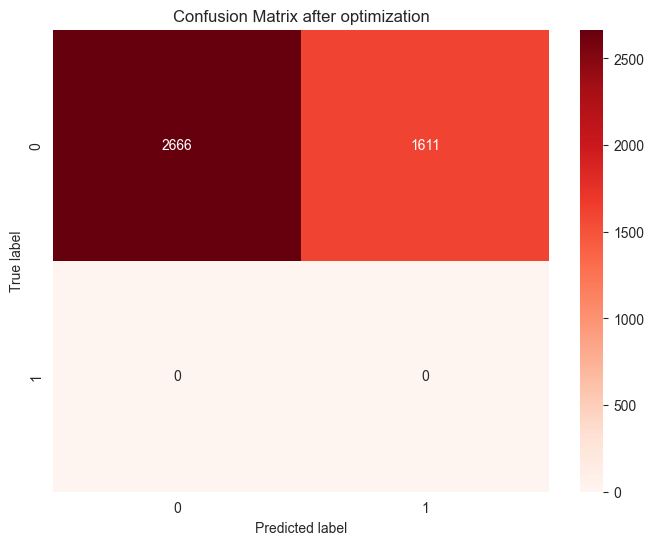

In [186]:


# Initialize Decision Tree classifier

dt_model = DecisionTreeClassifier(random_state=1103)


# Train the model

dt_model.fit(X_train, y_train)


# Make predictions

y_pred = dt_model.predict(X_test)


# Evaluate the model before optimization

accuracy_before_optimization_dt = accuracy_score(y_test, y_pred)


print(f"Accuracy before optimization for Decision Tree: {accuracy_before_optimization_dt}")


# Create confusion matrix

cm_before_optimization = confusion_matrix(y_test, y_pred)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_before_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix before optimization')

plt.show()


# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10],

    'criterion': ['gini', 'entropy']

}


# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_dt = random_search.best_estimator_


# Make predictions with the optimized model

y_pred_optimized = best_model_dt.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_dt = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Decision Tree: {accuracy_after_optimization_dt}")


# Create confusion matrix

cm_after_optimization = confusion_matrix(y_test, y_pred_optimized)


# Plot confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(cm_after_optimization, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted label')

plt.ylabel('True label')

plt.title('Confusion Matrix after optimization')

plt.show()

In [187]:
X = pd.concat([X_train, X_test], axis=0)

y = np.concatenate([y_train.values, y_test["Transported"].values])


from sklearn.model_selection import cross_val_score

In [188]:
# Create a list of dictionaries for the models before and after optimization to be plotted later

models = []

# Initialize the XGBoost classifier

clf = xgb.XGBClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score XGBoost: {mean_cv_score:.3f}")

models.append({"model":"XGBoost", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_xgb, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score XGBoost Optimized: {mean_cv_score:.3f}")

models.append({"model":"XGBoost", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the random forest classifier

clf = RandomForestClassifier(n_estimators=100, random_state=1103)

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Random Forest: {mean_cv_score:.3f}")

models.append({"model":"Random Forest", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_rf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Random Forest Optimized: {mean_cv_score:.3f}")

models.append({"model":"Random Forest", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the KNN classifier

clf = KNeighborsClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score KNN: {mean_cv_score:.3f}")

models.append({"model":"KNN", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_knn, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score KNN Optimized: {mean_cv_score:.3f}")

models.append({"model":"KNN", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the Decision Tree classifier

clf = DecisionTreeClassifier()

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Decision Tree: {mean_cv_score:.3f}")

models.append({"model":"Decision Tree", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_dt, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Decision Tree Optimized: {mean_cv_score:.3f}")

models.append({"model":"Decision Tree", "optimized":True, "score":mean_cv_score})

##########################################################################################

# Initialize the Logistic Regression classifier

clf = LogisticRegression(max_iter=2000)

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(clf, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Logistic Regression: {mean_cv_score:.3f}")

models.append({"model":"Logistic Regression", "optimized":False, "score":mean_cv_score})

# Perform cross-validation and compute the mean accuracy

mean_cv_score = np.mean(cross_val_score(best_model_lr, X, y, cv=5, scoring='accuracy'))

print(f"Mean cross-validation score Logistic Regression Optimized: {mean_cv_score:.3f}")

models.append({"model":"Logistic Regression", "optimized":True, "score":mean_cv_score})

models = pd.DataFrame(models)
print("\n\n\n")

print(models)

Mean cross-validation score XGBoost: 0.708
Mean cross-validation score XGBoost Optimized: 0.663
Mean cross-validation score Random Forest: 0.691
Mean cross-validation score Random Forest Optimized: 0.720
Mean cross-validation score KNN: 0.633
Mean cross-validation score KNN Optimized: 0.657
Mean cross-validation score Decision Tree: 0.690
Mean cross-validation score Decision Tree Optimized: 0.717
Mean cross-validation score Logistic Regression: 0.694
Mean cross-validation score Logistic Regression Optimized: 0.694




                 model  optimized     score
0              XGBoost      False  0.708481
1              XGBoost       True  0.663223
2        Random Forest      False  0.690748
3        Random Forest       True  0.719892
4                  KNN      False  0.632691
5                  KNN       True  0.656746
6        Decision Tree      False  0.690208
7        Decision Tree       True  0.716577
8  Logistic Regression      False  0.693678
9  Logistic Regression       True  0

C:\Users\scout\AppData\Local\Temp\ipykernel_21496\3939647171.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


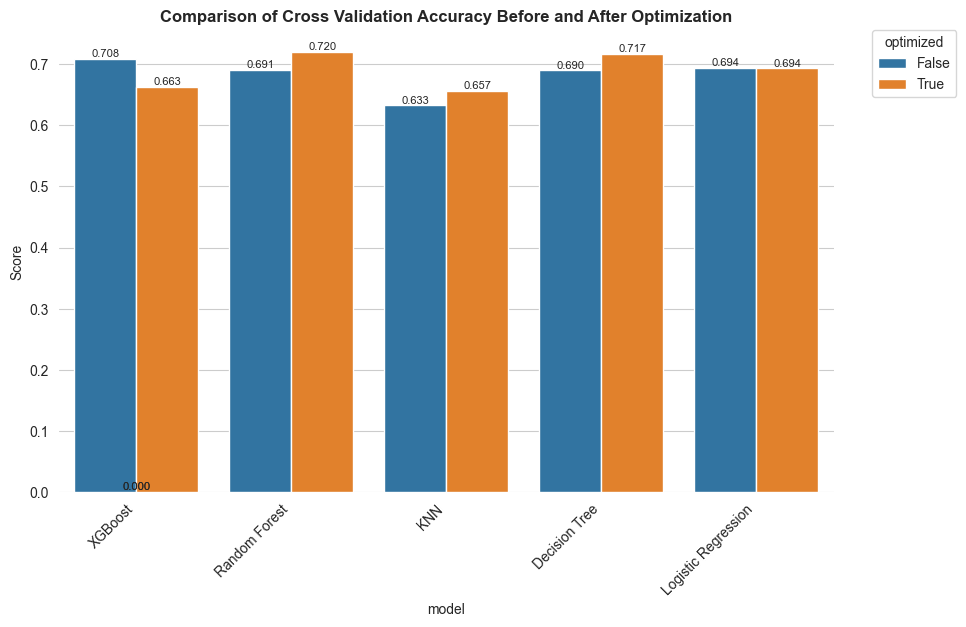

In [189]:
# Create the bar plot

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="model", y="score", hue="optimized", data=models, ax=ax)

sns.despine(left=True, bottom=True)

ax.set_ylabel("Score")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

ax.legend(title="optimized", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Add the title in bold font

plt.title("Comparison of Cross Validation Accuracy Before and After Optimization", fontweight='bold')


# Add the scores to each bar

for p in ax.patches:
    
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)


plt.show()


In [190]:

dt_model = DecisionTreeClassifier(random_state=1103)
# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 5, 10],

    'criterion': ['gini', 'entropy']

}

# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_dt = random_search.best_estimator_

print(best_params)

# Make predictions with the optimized model

y_pred_optimized = best_model_dt.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_dt = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Decision Tree: {accuracy_after_optimization_dt}")

{'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': 5, 'criterion': 'entropy'}
Accuracy after optimization for Decision Tree: 0.6233341126958148


In [191]:
#Used to pull passager IDs"
test = pd.read_csv("Data/test.csv")

In [192]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_optimized})

print(submission)

submission.to_csv('Data/submission.csv', index=False)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01        False
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01         True

[4277 rows x 2 columns]


from autogluon.tabular import TabularDataset, TabularPredictor 

#Error keeps popping up that could not convert string to float: 'Europa' Map changes them to numbers
train['HomePlanet'] = train["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3})
train['Destination'] = train["Destination"].map({'Trappist-1e' : 1, 'PSO J318.5-22' : 2, '55 Cancri e' : 3})
train['Cabin'] = train["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})

test['HomePlanet'] = test["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3})
test['Destination'] = test["Destination"].map({'Trappist-1e' : 1, 'PSO J318.5-22' : 2, '55 Cancri e' : 3})
test['Cabin'] = test["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})


#, "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"
columns_to_use = ["Transported","HomePlanet", "CryoSleep", "Cabin", "Destination", "Age"]
test_columns_to_use = [col for col in columns_to_use if col != "Transported"]  # Exclude 'Transported' from test data

# Select specified columns
train = TabularDataset(train)[columns_to_use]
test = TabularDataset(test)[test_columns_to_use]

# Define the predictor with path to save models
predictor = TabularPredictor(label='Transported', eval_metric='accuracy', path='ag_models').fit(
    train_data=train,
    presets='best_quality',  # Use the best quality preset
    auto_stack=True,  # Enable automatic stacking
    num_stack_levels=10,  # You can adjust this based on performance and computational resources
    time_limit=3600 * 1,  # Set a time limit for the search (optional, adjust based on needs)
    hyperparameters='multimodal',  # Use a wide range of models including neural networks
    hyperparameter_tune_kwargs={'num_trials': 10,
                                     'scheduler': 'local',
                                       'searcher': 'auto',
                                      }  # Optimize hyperparameters
    )

test = pd.read_csv('Data/test.csv')
  # Make predictions on the test data
predictions = predictor.predict(test)

# Get PassengerID from test data
passenger_ids = test['PassengerId']

# Combine PassengerID and predictions into a DataFrame
results_df = pd.DataFrame({'PassengerId': passenger_ids, "Transported": predictions})

# Save the results to a CSV file
results_df.to_csv('predictions.csv', index=False)

